# understanding the problem statement

Dream Housing Finance company deals in all home loans,the Customer first apply for home loan after that company validates the customer eligibility for loan.
The company wants to automate the loan eligibility process based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. 
The idea behind this project is to build a model that will help the company to predicts if a loan will get approved or not.

# Dataset Description


(Loan_ID : Unique Loan ID)/(Gender : Male/ Female)/(Married	Applicant married (Yes or No))/
(Dependents :Number of dependents)/(Education :Applicant Education (Graduate/ Under Graduate))/
(Self_Employed :Self employed (Yes or No))/
(ApplicantIncome :Applicant income)/(CoapplicantIncome :Coapplicant income)/
(LoanAmount :Loan amount in thousands)/
(Loan_Amount_Term :Term of loan in months)/
(Credit_History:credit history meets guidelines)/
(Property_Area:	Urban/ Semi Urban/ Rural)/
(Loan_Status:Loan approved (yes or No))

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# data preparation

# 1-checking missing values in each column of dataset

In [58]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# 2-filling missing values

In [59]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [60]:
data.Gender = data.Gender.fillna('Male')

In [61]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [62]:
data.Married = data.Married.fillna('Yes')

In [63]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [64]:
data.Dependents = data.Dependents.fillna('0')

In [65]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [66]:
data.Self_Employed = data.Self_Employed.fillna('No')

In [67]:
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())

In [68]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [69]:
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(360.0)

In [70]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [71]:
data.Credit_History = data.Credit_History.fillna(1.0)

In [72]:
#checking missing values in each column of dataset
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [73]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# Explore our dataset

In [74]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see there are three format of data types:
-object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status.
-int64: It represents the integer variables. ApplicantIncome is of this format.
-float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History.

We will first look Loan_Status.

In [75]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Among 614 Loan_Status :  422 are Accepted and  192 are  Rejected

<AxesSubplot:title={'center':'Loan_Status'}>

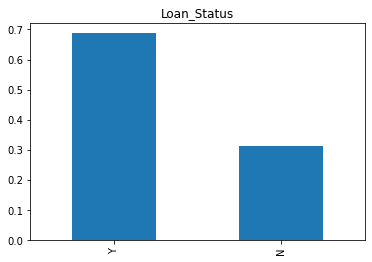

In [76]:
# Normalize can be set to True to print proportions instead of number 
data["Loan_Status"].value_counts(normalize=True)*100
data["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status')

Now lets visualize each feature separately

<AxesSubplot:title={'center':'Gender'}>

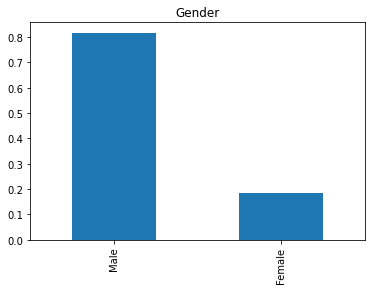

In [77]:
#Gender
data["Gender"].value_counts(normalize=True)*100
data["Gender"].value_counts(normalize=True).plot.bar(title = 'Gender')

In our dataset the "Gender" variable contain Male : 81% Female: 19%

<AxesSubplot:title={'center':'Married'}>

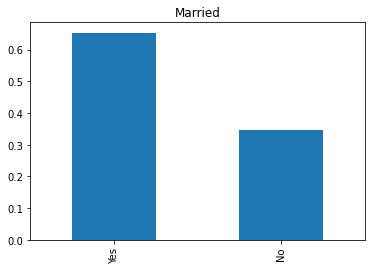

In [78]:
#Married
data["Married"].value_counts(normalize=True)*100
data["Married"].value_counts(normalize=True).plot.bar(title = 'Married')

Number of married people : 65%
Number of unmarried people : 35%

<AxesSubplot:title={'center':'Self_Employed'}>

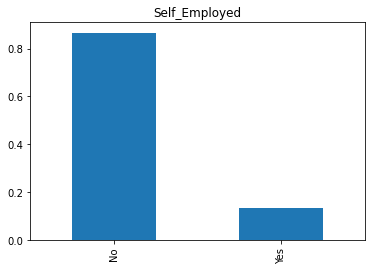

In [79]:
#Self_Employed
data['Self_Employed'].value_counts(normalize=True)*100
data['Self_Employed'].value_counts(normalize=True).plot.bar(title = 'Self_Employed')

Among 582 people only 14% are Self_Employed and rest of the 86% are Not_Self_Employed

<AxesSubplot:title={'center':'Credit_History'}>

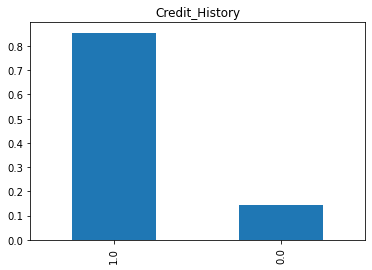

In [80]:
#Credit_History
data["Credit_History"].value_counts(normalize=True)*100
data["Credit_History"].value_counts(normalize=True).plot.bar(title = "Credit_History")

Around 84% applicants have repaid their debts.

<AxesSubplot:title={'center':'Dependents'}>

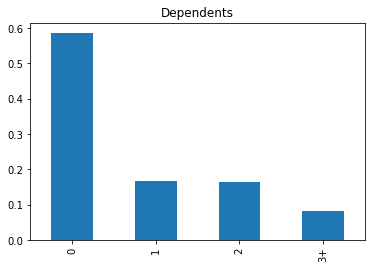

In [81]:
#Dependents
data['Dependents'].value_counts(normalize=True)*100
data['Dependents'].value_counts(normalize=True).plot.bar(title = 'Dependents')

58% people have 0 dependent

17% people have 1 dependent

17% people have 2 dependent

8% people have 3+ dependent



<AxesSubplot:title={'center':'Education'}>

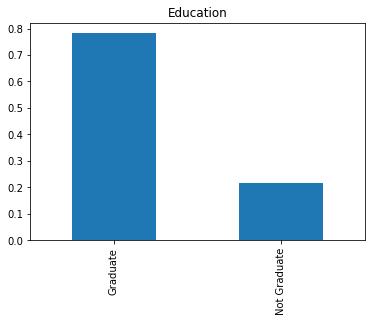

In [82]:
#Education
data["Education"].value_counts(normalize=True)*100
data["Education"].value_counts(normalize=True).plot.bar(title = "Education")

78% are Graduated and 22% are not Graduated

<AxesSubplot:title={'center':'Property_Area'}>

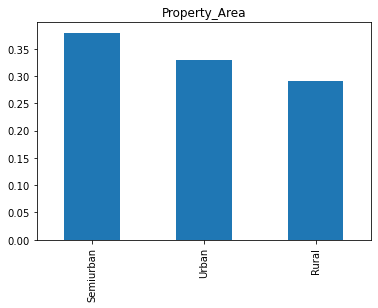

In [83]:
#Property_Area
data["Property_Area"].value_counts(normalize=True)*100
data["Property_Area"].value_counts(normalize=True).plot.bar(title = "Property_Area")

38% people from Semiurban area

33% people from Urban area

29% people from Rural area

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


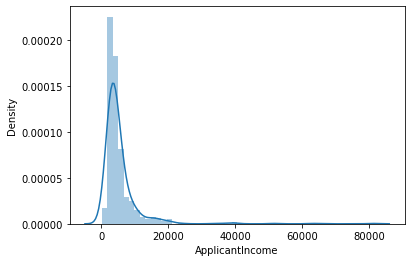

In [84]:
plt.figure()
plt.subplot()
sns.distplot(data["ApplicantIncome"]);


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


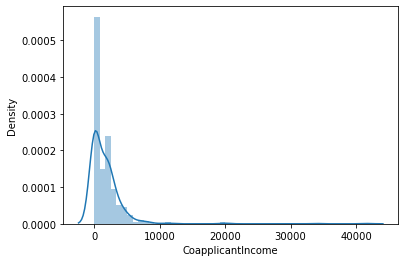

In [85]:
plt.figure()
plt.subplot()
sns.distplot(data["CoapplicantIncome"]);


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


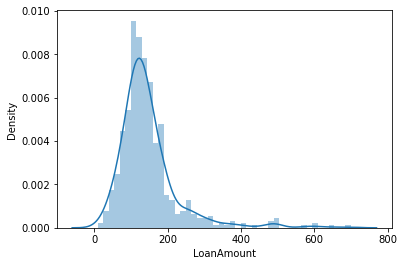

In [86]:
plt.figure()
plt.subplot()
df=data.dropna()
sns.distplot(df['LoanAmount']);

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


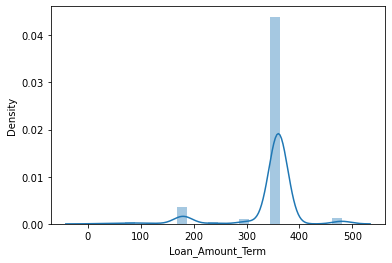

In [87]:
plt.figure()
plt.subplot()
df = data.dropna()
sns.distplot(df["Loan_Amount_Term"]);

let us see some realations between Loan_Status with Categorical Independent Variable

# 1-Relation between "Loan_Status" and "Gender"

Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347


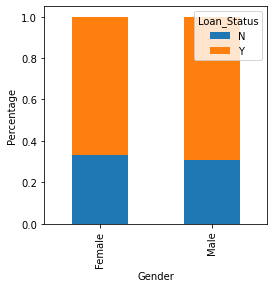

In [88]:
print(pd.crosstab(data["Gender"],data["Loan_Status"]))
Gender = pd.crosstab(data["Gender"],data["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Number of Female whose Loan was approed : 75

Number of Male whose Loan was approed : 339

Number of Female whose Loan was not approed : 37

Number of Male whose Loan was not approed : 150

Proportion of Male applicants is higher for the approved loans.

# 2- Relation between "Loan_Status" and "Married"

Loan_Status    N    Y
Married              
No            79  134
Yes          113  288


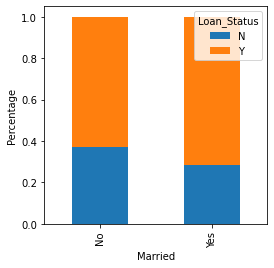

In [89]:
print(pd.crosstab(data["Married"],data["Loan_Status"]))
Married=pd.crosstab(data["Married"],data["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Number of married people whose Loan was approed : 285

Number of married people whose Loan was not approed : 113

Number of unmarried people whose Loan was approed : 134

Number of unmarried people whose Loan was not approed : 79

Proportion of Married applicants is higher for the approved loans.

# 3-Relation between "Loan_Status" and "Dependents"

Loan_Status    N    Y
Dependents           
0            113  247
1             36   66
2             25   76
3+            18   33


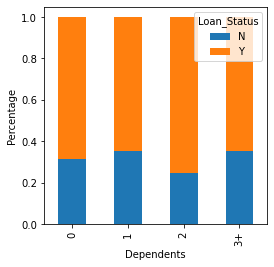

In [90]:
print(pd.crosstab(data['Dependents'],data["Loan_Status"]))
Dependents = pd.crosstab(data['Dependents'],data["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.show()

Number of dependents on the loan applicant : 0 and Loan was approed : 238

Number of dependents on the loan applicant : 0 and Loan was not approed : 107

Number of dependents on the loan applicant : 1 and Loan was approed : 66

Number of dependents on the loan applicant : 1 and Loan was not approed : 36

Number of dependents on the loan applicant : 2 and Loan was approed : 76

Number of dependents on the loan applicant : 2 and Loan was not approed : 25

Number of dependents on the loan applicant : 3+ and Loan was approed : 33

Number of dependents on the loan applicant : 3+ and Loan was not approed : 18

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

# Applying Label Encoder

Label Encoder is used to encode categorical data into numeric data

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
datatype = data.dtypes==object
columns = data.columns[datatype].tolist()
data[columns]=data[columns].apply(lambda val : le.fit_transform(val))

In [92]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [93]:
#Dropping Loan_id because it is of no use.
data.drop('Loan_ID',axis=1,inplace=True)

In [94]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# Splitting Data

Splitting data into training and test data using train_test_split

In [95]:
x = data.iloc[:, 1: 11].values
y = data.iloc[:, 11].values


In [96]:
x

array([[  0.,   0.,   0., ..., 360.,   1.,   2.],
       [  1.,   1.,   0., ..., 360.,   1.,   0.],
       [  1.,   0.,   0., ..., 360.,   1.,   2.],
       ...,
       [  1.,   1.,   0., ..., 360.,   1.,   2.],
       [  1.,   2.,   0., ..., 360.,   1.,   2.],
       [  0.,   0.,   0., ..., 360.,   0.,   1.]])

In [97]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=101)


test_size as 20% and train size is 80% of our total data

In [99]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.fit_transform(test_x)

# Training Model

# Logistic Regression

It is a basic form of classification algorithm. It is used when there are only 2 classes to classify. 

In [100]:
# importing the model and initialize it.
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
#fitting our training data into model using fit().
classifier.fit(train_x, train_y)

LogisticRegression(random_state=0)

In [101]:
# Predicting the Test set results
y_pred = classifier.predict(test_x)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [102]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred, test_y))

The accuracy of Logistic Regression is:  0.7967479674796748


let's try the same model but we change the test size to 10%

In [103]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.1,random_state=101)

In [104]:
# importing the model and initialize it.
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
#fitting our training data into model using fit().
classifier.fit(train_x, train_y)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [105]:
# Predicting the Test set results
y_pred = classifier.predict(test_x)

In [106]:
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred, test_y))

The accuracy of Logistic Regression is:  0.7580645161290323


# K-Nearest Neighbour

we will try  another model to compare between theme whitch model has the best accuracy

KNN is the simplest algorithm, it uses the nearest data points to classify. Nearest Data points are found using distance functions like Euclidean distance.

In [ ]:
# importing the model and initialize it.
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
#fitting our training data into model using fit().
classifier.fit(train_x, train_y)


In [113]:
# Predicting the Test set results
y_pred = classifier.predict(test_x)
y_pred


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [114]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred, test_y))


The accuracy of KNN is:  0.6935483870967742


In [115]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_y, y_pred))

[[ 6 15]
 [ 4 37]]


# Decision Tree Classification

In [108]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [109]:
# Predicting the Test set results
y_pred = classifier.predict(test_x)
y_pred


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [110]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Decision Tree Classifier is: ', metrics.accuracy_score(y_pred, test_y))


The accuracy of Decision Tree Classifier is:  0.6935483870967742


In [111]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_y, y_pred))

[[ 6 15]
 [ 4 37]]


we notice that the best model from this 3 models is logistic regression,
our predictions are almost 79% accurate, i.e. we have identified 79% of the loan status correctly  

From the Exploratory Data Analysis, we could see How each of the features relates to the target. 
Also, it can be seen from the evaluation of three models that Logistic Regression performed better than others, 



when i did the viisialisation of some features i noticed that there are some outliers we can deal with theme and improve our model performance